<a href="https://colab.research.google.com/github/sahug/ds-practice/blob/main/Kaggle%20-%20Spaceship%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle - Spaceship Titanic**

**Dataset**

Link: https://www.kaggle.com/competitions/spaceship-titanic/data

**Unzip Files**

In [1]:
import zipfile
with zipfile.ZipFile("/content/spaceship-titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Load Dataset**

In [2]:
import pandas as pd
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
test_df = test.copy()

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

**Data Exploration**

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


**Balance Check**

In [7]:
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

**NaN Data**

**Prepare Data**

In [8]:
ds = train.copy()

**Null Values**

In [9]:
ds.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Data Imputation**

**Categorlical Data**

In [10]:
# Train
ds["HomePlanet"] = ds["HomePlanet"].fillna(ds["HomePlanet"].mode()[0])
ds["CryoSleep"] = ds["CryoSleep"].fillna(ds["CryoSleep"].mode()[0])
ds["Cabin"] = ds["Cabin"].fillna(ds["Cabin"].mode()[0])
ds["Destination"] = ds["Destination"].fillna(ds["Destination"].mode()[0])
ds["VIP"] = ds["VIP"].fillna(ds["VIP"].mode()[0])

In [11]:
# Test
test["HomePlanet"] = test["HomePlanet"].fillna(test["HomePlanet"].mode()[0])
test["CryoSleep"] = test["CryoSleep"].fillna(test["CryoSleep"].mode()[0])
test["Cabin"] = test["Cabin"].fillna(test["Cabin"].mode()[0])
test["Destination"] = test["Destination"].fillna(test["Destination"].mode()[0])
test["VIP"] = test["VIP"].fillna(test["VIP"].mode()[0])

**Neumerical Data**

In [12]:
# Train
ds["Age"] = ds["Age"].fillna(ds["Age"].median())
ds["RoomService"] = ds["RoomService"].fillna(ds["RoomService"].median())
ds["FoodCourt"] = ds["FoodCourt"].fillna(ds["FoodCourt"].median())
ds["ShoppingMall"] = ds["ShoppingMall"].fillna(ds["ShoppingMall"].median())
ds["Spa"] = ds["Spa"].fillna(ds["Spa"].median())
ds["VRDeck"] = ds["VRDeck"].fillna(ds["VRDeck"].median())

In [13]:
# Test
test["Age"] = test["Age"].fillna(test["Age"].median())
test["RoomService"] = test["RoomService"].fillna(test["RoomService"].median())
test["FoodCourt"] = test["FoodCourt"].fillna(test["FoodCourt"].median())
test["ShoppingMall"] = test["ShoppingMall"].fillna(test["ShoppingMall"].median())
test["Spa"] = test["Spa"].fillna(test["Spa"].median())
test["VRDeck"] = test["VRDeck"].fillna(test["VRDeck"].median())

In [14]:
ds.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

**Data Preprocessing**

In [16]:
# Train
ds[["Group", "Id"]] = ds["PassengerId"].str.split("_", expand=True)
ds[['Deck', 'Num', 'Side']] = ds['Cabin'].str.split('/', expand = True)

In [17]:
# Test
test[["Group", "Id"]] = test["PassengerId"].str.split("_", expand=True)
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', expand = True)

In [18]:
# Train
group_list = list(ds["Group"].value_counts().sort_index())
group_size = []
for i in range(len(group_list)):
  for j in range(group_list[i]):
    group_size.append(group_list[i])

ds["group_size"] = group_size

In [19]:
# Test
group_list = list(test["Group"].value_counts().sort_index())
group_size = []
for i in range(len(group_list)):
  for j in range(group_list[i]):
    group_size.append(group_list[i])

test["group_size"] = group_size

In [20]:
# Prprocess Cabin
def processCabin(df):
    cabin_num = ['Cabin1','Cabin2','Cabin3','Cabin4','Cabin5','Cabin6','Cabin7']
    df['Num'] = df['Num'].astype(int)

    df[cabin_num[0]] = (df['Num'] < 300)
    df[cabin_num[1]] = ((df['Num'] >= 300) & (df['Num'] < 600))
    df[cabin_num[2]] = ((df['Num'] >= 600) & (df['Num'] < 900))
    df[cabin_num[3]] = ((df['Num'] >= 900) & (df['Num'] < 1200))
    df[cabin_num[4]] = ((df['Num'] >= 1200) & (df['Num'] < 1500))
    df[cabin_num[5]] = ((df['Num'] >= 1500) & (df['Num'] < 1800))
    df[cabin_num[6]] = (df['Num'] >= 1800)

In [21]:
# Train
processCabin(ds)

In [22]:
# Test
processCabin(test)

**Encoding**

In [23]:
# Train
category_list = ['HomePlanet','Destination','Deck','Side']
ohe_ds = pd.get_dummies(ds[category_list])
ds = pd.concat([ds, ohe_ds], axis=1)

In [24]:
# Test
category_list = ['HomePlanet','Destination','Deck','Side']
ohe_test = pd.get_dummies(test[category_list])
test = pd.concat([test, ohe_test], axis=1)

In [25]:
# Train
def encodeBoolean(feature):
  for i in range(len(ds[feature])):
    if ds[feature][i] == True:
      ds[feature][i] = 1
    else:
      ds[feature][i] = 0
  return ds[feature]

bool_list = ["CryoSleep", "VIP", "Transported", "Cabin1", "Cabin2", "Cabin3", "Cabin4", "Cabin5", "Cabin6", "Cabin7"]
for i in bool_list:
  ds[i] = encodeBoolean(i)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
# Test
def encodeBoolean(feature):
  for i in range(len(test[feature])):
    if test[feature][i] == True:
      test[feature][i] = 1
    else:
      test[feature][i] = 0
  return test[feature]

bool_list = ["CryoSleep", "VIP", "Cabin1", "Cabin2", "Cabin3", "Cabin4", "Cabin5", "Cabin6", "Cabin7"]
for i in bool_list:
  test[i] = encodeBoolean(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Drop unwanted columns**

In [27]:
ds = ds.drop(columns=['PassengerId', 'Id', 'HomePlanet','Cabin', 'Destination','Group','Deck', 'Num', 'Side', 'Name'])

In [28]:
test = test.drop(columns=['PassengerId', 'Id', 'HomePlanet','Cabin', 'Destination','Group','Deck', 'Num', 'Side', 'Name'])

**Categorical Data**

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def categorical_eda(feature):
  plt.figure(figsize=(10, 5))
  sns.countplot(ds[feature], order=ds[feature].value_counts(ascending=False).index)
  train.groupby(ds[feature])["Transported"].value_counts().unstack(0).plot(kind="bar", 
                                                                                 figsize=(10, 5),
                                                                                 xlabel="Transported",
                                                                                 ylabel="Count")

**HomePlanet**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


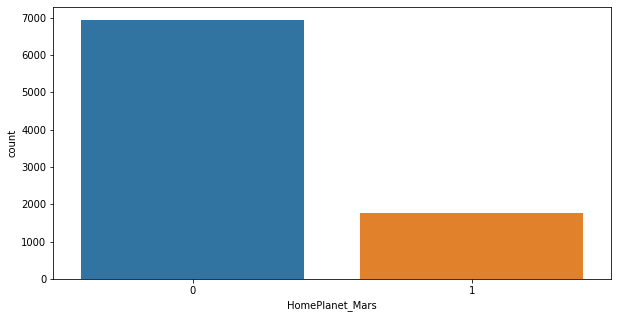

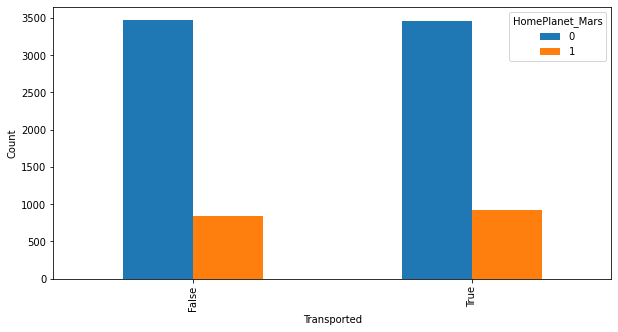

In [31]:
categorical_eda("HomePlanet_Mars")

**CryoSleep**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


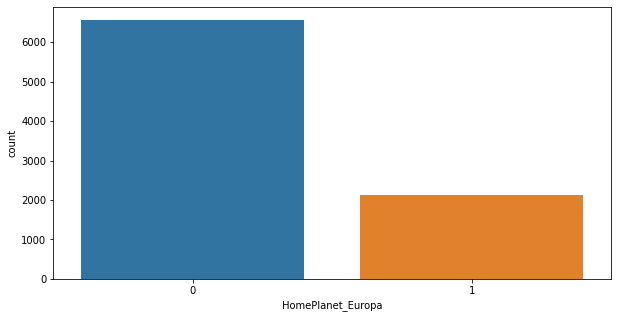

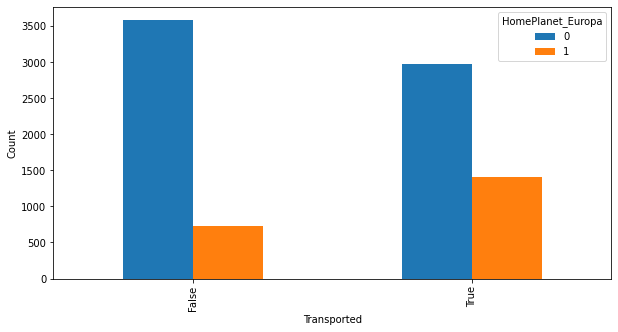

In [32]:
categorical_eda("HomePlanet_Europa")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


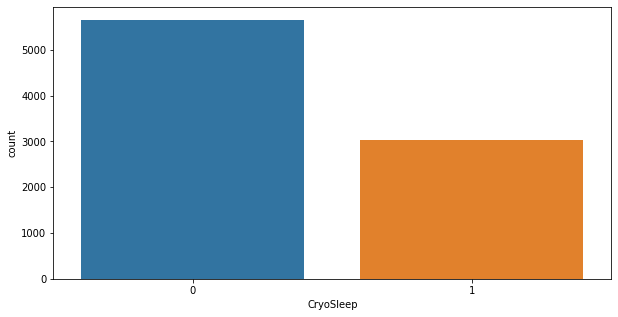

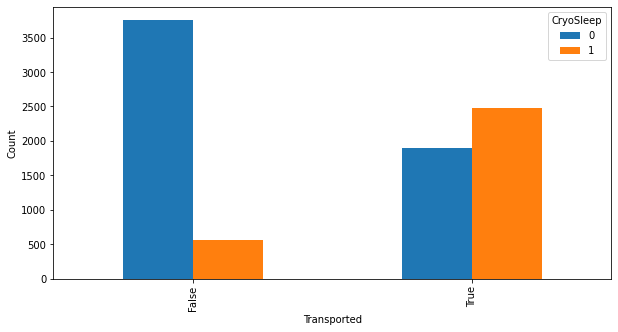

In [33]:
categorical_eda("CryoSleep")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


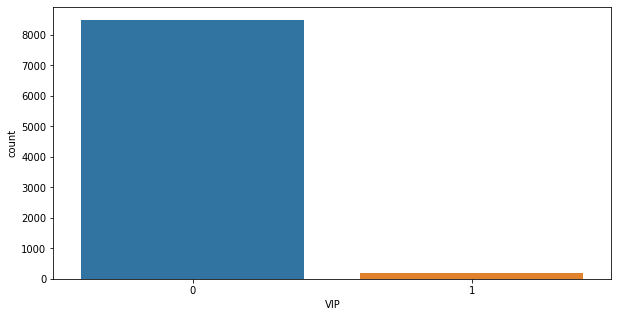

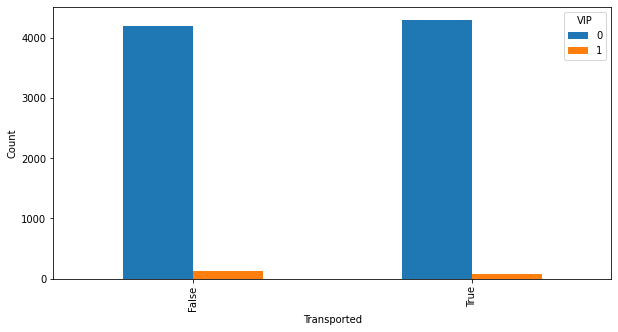

In [34]:
categorical_eda("VIP")

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


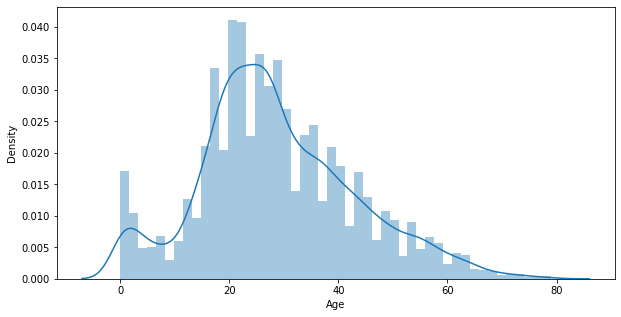

In [35]:
plt.figure(figsize=(10, 5))
sns.distplot(ds["Age"])

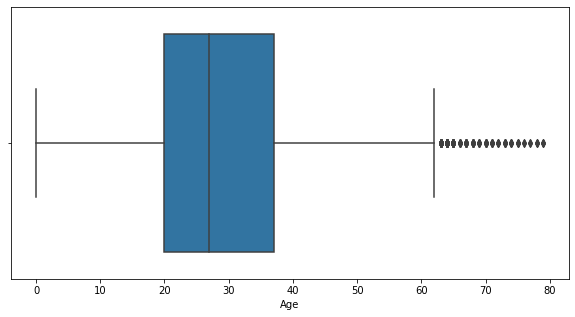

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', data=ds)


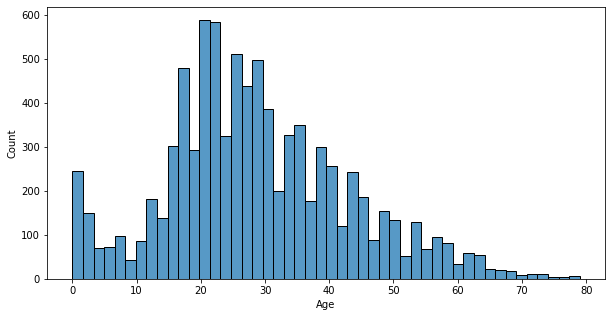

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=ds, x="Age")

**Correlation Matrix**

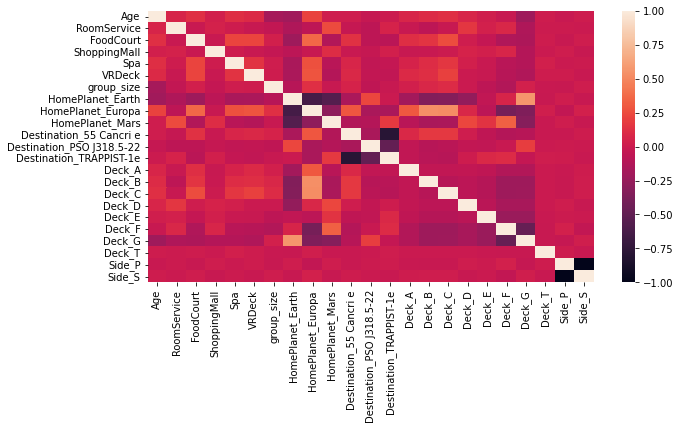

In [38]:
plt.figure(figsize=(10, 5))
sns.heatmap(ds.corr())

**Feature and Target Split**

In [39]:
Y = ds["Transported"].astype("int")
X = ds.drop(["Transported"], axis=1)

**Scale**

In [40]:
# Train
cols = X.columns

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
ds_scaled = mms.fit_transform(X)
ds_scaled = pd.DataFrame(ds_scaled, columns=cols)
ds_scaled.head()
X = ds_scaled
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group_size,Cabin1,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.142857,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.142857,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
# Test
cols = test.columns

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
test_scaled = mms.fit_transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=cols)
test_scaled.head()
test = test_scaled
test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group_size,Cabin1,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1.0,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Train and Test Split**

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7823, 32), (870, 32), (7823,), (870,))

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [44]:
y_pred = lr.predict(x_test)

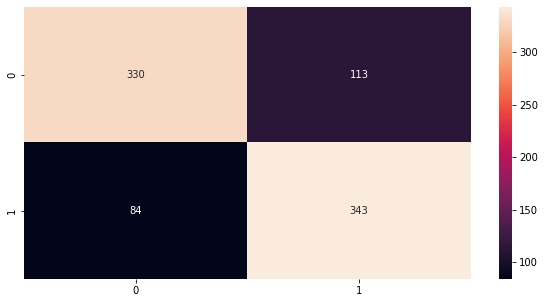

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm,  annot=True, fmt="d")

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.7735632183908046

**Models**

In [47]:
%pip install -qq catboost

In [48]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = [("RandomForestClassifier", RandomForestClassifier), ("AdaBoostClassifier", AdaBoostClassifier), 
          ("GradientBoostingClassifier", GradientBoostingClassifier), ("DecisionTreeClassifier", DecisionTreeClassifier),
          ("XGBClassifier", XGBClassifier), ("LGBMClassifier", XGBClassifier),
          ("CatBoostClassifier", CatBoostClassifier)]

In [49]:
for model_name, model in models:
    print(model_name)
    m = model()
    m.fit(x_train, y_train)
    print("\t\tTest Score = ", m.score(x_test, y_test) * 100)
    print("\t\tTrain Score = ", m.score(x_train, y_train) * 100)
    print("\t\tScore Error = ",abs((m.score(x_train, y_train) - (m.score(x_test, y_test)))) * 100)

RandomForestClassifier
		Test Score =  77.93103448275862
		Train Score =  98.42771315352167
		Score Error =  20.496678670763046
AdaBoostClassifier
		Test Score =  77.47126436781609
		Train Score =  80.41671992841621
		Score Error =  2.9454555606001187
GradientBoostingClassifier
		Test Score =  78.73563218390804
		Train Score =  82.25744599258597
		Score Error =  3.5218138086779205
DecisionTreeClassifier
		Test Score =  72.98850574712644
		Train Score =  98.42771315352167
		Score Error =  25.439207406395226
XGBClassifier
		Test Score =  78.04597701149424
		Train Score =  82.00178959478461
		Score Error =  3.9558125832903634
LGBMClassifier
		Test Score =  78.04597701149424
		Train Score =  82.00178959478461
		Score Error =  3.9558125832903634
CatBoostClassifier
Learning rate set to 0.024797
0:	learn: 0.6797036	total: 61.5ms	remaining: 1m 1s
1:	learn: 0.6681471	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6590378	total: 86ms	remaining: 28.6s
3:	learn: 0.6496680	total: 101ms	remaining: 25.1s

Since CatBoostClassifier gives better result we will use it.

In [50]:
m = CatBoostClassifier(iterations=10000,eval_metric='Accuracy',verbose=1000)
m.fit(x_train, y_train)
print(f"Test Score = ", m.score(x_test, y_test) * 100)
print(f"Train Score = ",m.score(x_train, y_train) * 100)
pred = m.predict(test)
pred

Learning rate set to 0.003002
0:	learn: 0.7769398	total: 11ms	remaining: 1m 50s
1000:	learn: 0.8134987	total: 11.5s	remaining: 1m 43s
2000:	learn: 0.8230858	total: 26.7s	remaining: 1m 46s
3000:	learn: 0.8312668	total: 40s	remaining: 1m 33s
4000:	learn: 0.8413652	total: 45.2s	remaining: 1m 7s
5000:	learn: 0.8547872	total: 50.4s	remaining: 50.4s
6000:	learn: 0.8639908	total: 55.6s	remaining: 37s
7000:	learn: 0.8705100	total: 1m	remaining: 26s
8000:	learn: 0.8771571	total: 1m 5s	remaining: 16.5s
9000:	learn: 0.8835485	total: 1m 11s	remaining: 7.9s
9999:	learn: 0.8882782	total: 1m 16s	remaining: 0us
Test Score =  80.11494252873564
Train Score =  88.8278154160808


array([1, 0, 1, ..., 1, 1, 1])

In [51]:
pred = [True if i == 1 else False for i in pred]

In [52]:
sample_submission = pd.DataFrame({
    "PassengerId":test_df.PassengerId,
    "Transported": pred
})

In [53]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [54]:
sample_submission.to_csv("/content/submission.csv", index=False)